In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

2023-11-20 00:10:08.168889: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-20 00:10:08.450105: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-20 00:10:09.302919: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import os
import numpy as np
from PIL import Image

data = []
labels = []
classes = 43

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join('Train', str(i))  # Assuming "Train" is in the current directory
    images = os.listdir(path)
    for a in images:
        try:
            image_path = os.path.join(path, a)
            image = Image.open(image_path)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image: {str(e)}")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)


Error loading image: [Errno 21] Is a directory: 'Train/1/.ipynb_checkpoints'
(39209, 30, 30, 3) (39209,)


In [3]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


2023-11-20 00:11:30.844687: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7923 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe MIG 1g.10gb, pci bus id: 0000:e3:00.0, compute capability: 8.0


In [5]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")


Epoch 1/15


2023-11-20 00:11:41.898790: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-11-20 00:11:43.589168: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-11-20 00:11:44.990507: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-20 00:11:45.023520: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x555eaa740d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-20 00:11:45.023552: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100 80GB PCIe MIG 1g.10gb, Compute Capability 8.0
2023-11-20 00:11:45.059953: I tensorflow/compiler/mlir/tensorflow/utils/dum

981/981 [==============================] - 11s 5ms/step - loss: 1.5400 - accuracy: 0.5980 - val_loss: 0.2432 - val_accuracy: 0.9448
Epoch 2/15
981/981 [==============================] - 4s 4ms/step - loss: 0.4337 - accuracy: 0.8794 - val_loss: 0.2115 - val_accuracy: 0.9443
Epoch 3/15
981/981 [==============================] - 4s 4ms/step - loss: 0.3012 - accuracy: 0.9189 - val_loss: 0.0833 - val_accuracy: 0.9792
Epoch 4/15
981/981 [==============================] - 4s 4ms/step - loss: 0.2548 - accuracy: 0.9328 - val_loss: 0.0586 - val_accuracy: 0.9847
Epoch 5/15
981/981 [==============================] - 4s 4ms/step - loss: 0.2375 - accuracy: 0.9373 - val_loss: 0.0540 - val_accuracy: 0.9866
Epoch 6/15
981/981 [==============================] - 4s 4ms/step - loss: 0.2278 - accuracy: 0.9410 - val_loss: 0.0846 - val_accuracy: 0.9779
Epoch 7/15
981/981 [==============================] - 4s 4ms/step - loss: 0.2184 - accuracy: 0.9442 - val_loss: 0.0492 - val_accuracy: 0.9885
Epoch 8/15
981/9

/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


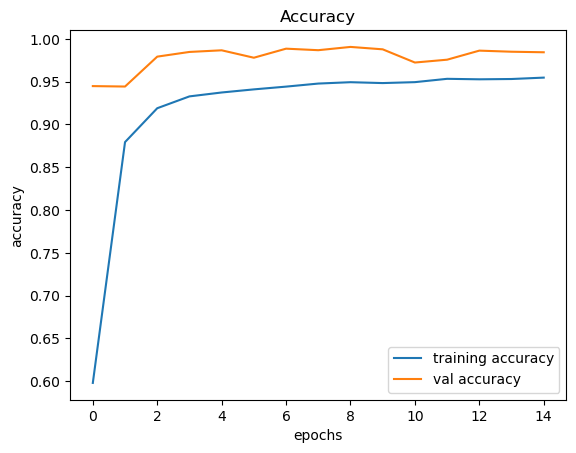

In [7]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

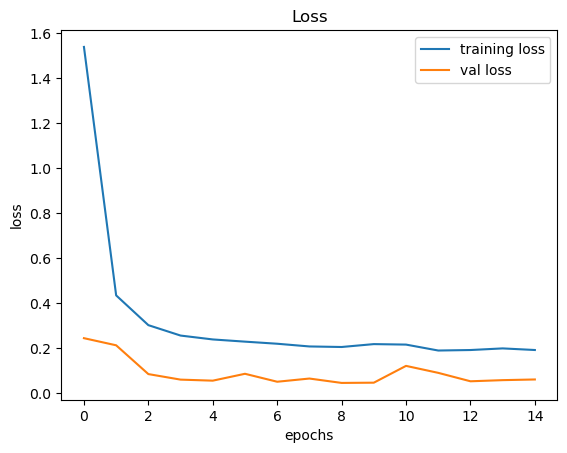

In [8]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

# pred = model.predict_classes(X_test)
predict = model.predict(X_test)
predict=np.argmax(predict,axis=1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(labels, predict))

model.save('traffic_classifier.h5')

395/395 [==============================] - 0s 1ms/step
Accuracy:  0.9554235946159937


/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
